# Zyfra

# Contents <a id='back'></a>

* [1 -Introducción](#1)
* [2 -Exploracion Datos](#2)
* [3 -Analisis Datos](#3)
    * [3.1 Calculo del Recupero Rougher](#3.1)
    * [3.2 Caracteristicas no Disponibles](#3.2)
    * [3.3 Concentracion Rougher](#3.3)
    * [3.4 Patron de Alimentacion](#3.4)
    * [3.5 Concentracion total](#3.5)
* [4 -Calculo sMAPE](#4)
* [5 -Modelizacion](#5)
    * [5.1 Variables Entrenamiento](#5.1)
    * [5.2 Arbol de Decision](#5.2)
    * [5.3 Bosque](#5.3)
    * [5.3 Regresion Lineal](#5.4)
* [6 -Prueba Test](#6)
* [7 -Conclusiones](#7)

## Introduccion <a id='1'></a>

La empresa desarrolla soluciones eficientes para la industria pesada.

El objetivo es desarrollar un prototipo de machine learning para pedecir la cantidad de oro extraido del mineral. Este modelo ayudara a optimizar la produccion y a eliminar los parametros no rengables.


Nuestos pasos seran:
* 1- Extraer los datos.
* 2- Procesar y analisar los datos.
* 3- Examinar el equilibrio de clases y entrenar al modelo.
* 4- Aplicar las metricas para determinar la calidad del modelo
* 5- Conclusiones

## Exploracion Datos <a id='2'></a>

In [1]:
# Cargar todas las librerías
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.ticker import FixedLocator, FixedFormatter
from scipy import stats as st
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score, precision_score, recall_score, f1_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LogisticRegression
from matplotlib import pyplot as plt
from sklearn import tree
from sklearn.utils import shuffle
from sklearn.preprocessing import OrdinalEncoder
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from matplotlib import pyplot as plt
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import make_scorer
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.preprocessing import StandardScaler



In [2]:
# Carga el archivo de datos en un DataFrame
try:
    df_train=pd.read_csv('G:\Mi unidad\Posgrados\Data Sciencia\Proyectos\Proyecto Integrador 2- Oro\gold_recovery_train.csv')
    df_test=pd.read_csv('G:\Mi unidad\Posgrados\Data Sciencia\Proyectos\Proyecto Integrador 2- Oro\gold_recovery_test.csv')
    df_full=pd.read_csv('G:\Mi unidad\Posgrados\Data Sciencia\Proyectos\Proyecto Integrador 2- Oro\gold_recovery_full.csv')
    
except:
    df_train = pd.read_csv('gold_recovery_train.csv')
    df_test = pd.read_csv('gold_recovery_test.csv')
    df_full = pd.read_csv('gold_recovery_full.csv')

In [3]:
#Informacion
df_full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22716 entries, 0 to 22715
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   date                                                22716 non-null  object 
 1   final.output.concentrate_ag                         22627 non-null  float64
 2   final.output.concentrate_pb                         22629 non-null  float64
 3   final.output.concentrate_sol                        22331 non-null  float64
 4   final.output.concentrate_au                         22630 non-null  float64
 5   final.output.recovery                               20753 non-null  float64
 6   final.output.tail_ag                                22633 non-null  float64
 7   final.output.tail_pb                                22516 non-null  float64
 8   final.output.tail_sol                               22445 non-null  float64


In [4]:
#Detalle
df_full.describe()

,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,primary_cleaner.input.sulfate,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
count,22627.000000,22629.000000,22331.000000,22630.000000,20753.000000,22633.000000,22516.000000,22445.000000,22635.000000,21107.000000,...,22571.000000,22587.000000,22608.000000,22607.000000,22615.000000,22615.000000,22615.000000,22616.000000,22597.000000,22615.000000
mean,4.781559,9.095308,8.640317,40.001172,67.447488,8.923690,2.488252,9.523632,2.827459,140.277672,...,18.205125,-499.878977,14.356474,-476.532613,14.883276,-503.323288,11.626743,-500.521502,17.976810,-519.361465
std,2.030128,3.230797,3.785035,13.398062,11.616034,3.517917,1.189407,4.079739,1.262834,49.919004,...,6.560700,80.273964,5.655791,93.822791,6.372811,72.925589,5.757449,78.956292,6.636203,75.477151
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000003,...,0.000000,-799.920713,0.000000,-800.836914,-0.423260,-799.741097,0.427084,-800.258209,-0.079426,-810.473526
25%,4.018525,8.750171,7.116799,42.383721,63.282393,7.684016,1.805376,8.143576,2.303108,110.177081,...,14.095940,-500.896232,10.882675,-500.309169,10.941299,-500.628697,8.037533,-500.167897,13.968418,-500.981671
50%,4.953729,9.914519,8.908792,44.653436,68.322258,9.484369,2.653001,10.212998,2.913794,141.330501,...,18.007326,-499.917108,14.947646,-499.612292,14.859117,-499.865158,10.989756,-499.951980,18.004215,-500.095463
75%,5.862593,10.929839,10.705824,46.111999,72.950836,11.084557,3.287790,11.860824,3.555077,174.049914,...,22.998194,-498.361545,17.977502,-400.224147,18.014914,-498.489381,14.001193,-499.492354,23.009704,-499.526388
max,16.001945,17.031899,19.615720,53.611374,100.000000,19.552149,6.086532,22.861749,9.789625,274.409626,...,60.000000,-127.692333,31.269706,-6.506986,63.116298,-244.483566,39.846228,-120.190931,54.876806,-29.093593


In [5]:
df_full.head(10)

,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,...,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
1,2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,...,13.992281,-505.503262,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184
2,2016-01-15 02:00:00,6.055926,10.213995,5.383759,42.657501,68.116445,10.507046,0.953716,16.208849,2.257889,...,14.015015,-502.520901,11.912783,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363
3,2016-01-15 03:00:00,6.047977,9.977019,4.858634,42.689819,68.347543,10.422762,0.883763,16.532835,2.146849,...,14.036510,-500.857308,11.999550,-501.193686,9.970366,-499.201640,7.977324,-500.255908,14.005551,-599.996129
4,2016-01-15 04:00:00,6.148599,10.142511,4.939416,42.774141,66.927016,10.360302,0.792826,16.525686,2.055292,...,14.027298,-499.838632,11.953070,-501.053894,9.925709,-501.686727,7.894242,-500.356035,13.996647,-601.496691
5,2016-01-15 05:00:00,6.482968,10.049416,5.480257,41.633678,69.465816,10.182708,0.664118,16.999638,1.918586,...,13.938497,-500.970168,11.883350,-500.395298,10.054147,-496.374715,7.965083,-499.364752,14.017067,-599.707915
6,2016-01-15 06:00:00,6.533849,10.058141,4.569100,41.995316,69.300835,10.304598,0.807342,16.723575,2.058913,...,14.046819,-500.971133,12.091543,-500.501426,10.003247,-497.083180,8.010890,-500.002423,14.029649,-600.905470
7,2016-01-15 07:00:00,6.130823,9.935481,4.389813,42.452727,70.230976,10.443288,0.949346,16.689959,2.143437,...,13.974691,-501.819696,12.101324,-500.583446,9.873169,-499.171928,7.993381,-499.794518,13.984498,-600.411070
8,2016-01-15 08:00:00,5.834140,10.071156,4.876389,43.404078,69.688595,10.420140,1.065453,17.201948,2.209881,...,13.964030,-504.252450,12.060738,-501.174549,10.033838,-501.178133,7.881604,-499.729434,13.967135,-599.061188
9,2016-01-15 09:00:00,5.687063,9.980404,5.282514,43.235220,70.279619,10.487013,1.159805,17.483979,2.209593,...,13.989632,-503.195299,12.052233,-500.928547,9.962574,-502.986357,7.979219,-500.146835,13.981614,-598.070855


In [6]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16860 entries, 0 to 16859
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   date                                                16860 non-null  object 
 1   final.output.concentrate_ag                         16788 non-null  float64
 2   final.output.concentrate_pb                         16788 non-null  float64
 3   final.output.concentrate_sol                        16490 non-null  float64
 4   final.output.concentrate_au                         16789 non-null  float64
 5   final.output.recovery                               15339 non-null  float64
 6   final.output.tail_ag                                16794 non-null  float64
 7   final.output.tail_pb                                16677 non-null  float64
 8   final.output.tail_sol                               16715 non-null  float64


In [7]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5856 entries, 0 to 5855
Data columns (total 53 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   date                                        5856 non-null   object 
 1   primary_cleaner.input.sulfate               5554 non-null   float64
 2   primary_cleaner.input.depressant            5572 non-null   float64
 3   primary_cleaner.input.feed_size             5856 non-null   float64
 4   primary_cleaner.input.xanthate              5690 non-null   float64
 5   primary_cleaner.state.floatbank8_a_air      5840 non-null   float64
 6   primary_cleaner.state.floatbank8_a_level    5840 non-null   float64
 7   primary_cleaner.state.floatbank8_b_air      5840 non-null   float64
 8   primary_cleaner.state.floatbank8_b_level    5840 non-null   float64
 9   primary_cleaner.state.floatbank8_c_air      5840 non-null   float64
 10  primary_clea

In [8]:
df_full['date']=pd.to_datetime(df_full['date'], format='%Y-%m-%d %H:%M:%S')
df_train['date']=pd.to_datetime(df_train['date'], format='%Y-%m-%d %H:%M:%S')
df_test['date']=pd.to_datetime(df_test['date'], format='%Y-%m-%d %H:%M:%S')


In [9]:
df_full['day']=pd.DatetimeIndex(df_full['date']).date
df_full['day'] = pd.to_datetime(df_full['day'])

df_full['año']=pd.DatetimeIndex(df_full['date']).year
df_full['año'] = pd.to_datetime(df_full['año'])

df_full['mes']=pd.DatetimeIndex(df_full['date']).month
df_full['mes'] = pd.to_datetime(df_full['mes'])

df_full['dia']=pd.DatetimeIndex(df_full['date']).day
df_full['dia'] = pd.to_datetime(df_full['dia'])

#### Valores Ausentes

<Axes: >

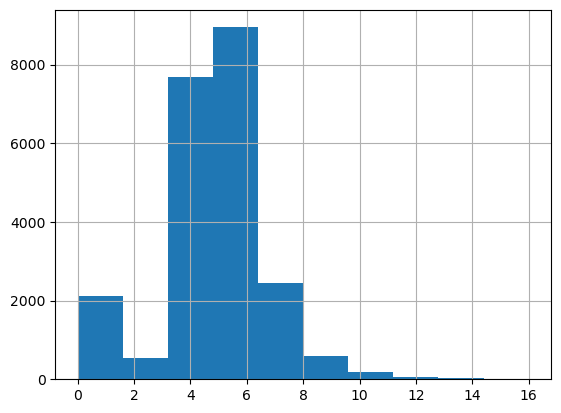

In [10]:
#final.output.concentrate_ag

df_full['final.output.concentrate_ag'].hist()

<Axes: >

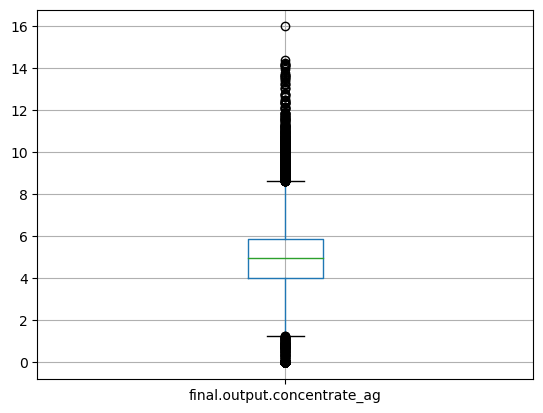

In [11]:
#final.output.concentrate_ag

df_full.boxplot('final.output.concentrate_ag')

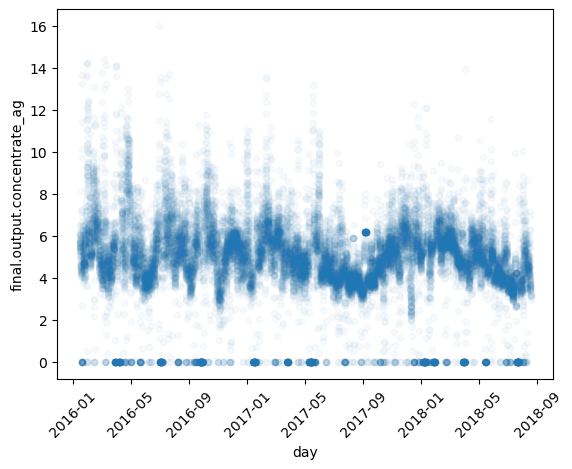

In [12]:
# crear la figura y el gráfico de dispersión
fig = df_full.plot(x='day', y='final.output.concentrate_ag', kind='scatter', alpha=0.03)


# rotar las etiquetas en 45 grados
labels = df_full['day'][::100].dt.strftime('%Y-%m-%d').tolist()
fig.tick_params(axis='x', labelrotation=45)

# mostrar la figura
plt.show()

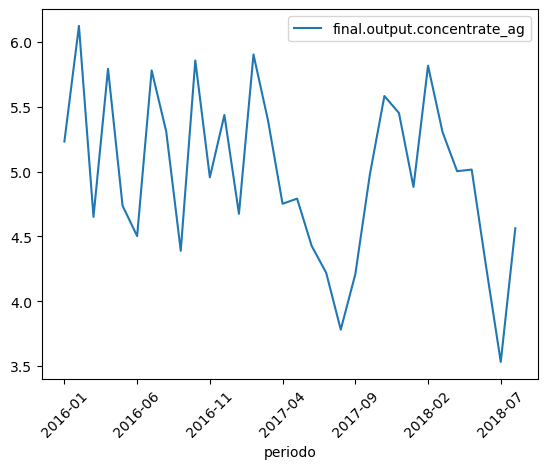

In [13]:
means_by_group = df_full.pivot_table(index=['año','mes'],values=['final.output.concentrate_ag'],aggfunc='median').reset_index()
means_by_group['año']=means_by_group['año'].apply(lambda x: str(x)[-4:])
means_by_group['mes']=means_by_group['mes'].apply(lambda x: str(x)[-2:])
means_by_group['periodo'] = means_by_group['año'].astype(str) + '-' + means_by_group['mes'].astype(str)


# crear la figura y el gráfico de dispersión
fig = means_by_group.plot(x='periodo', y='final.output.concentrate_ag')


# rotar las etiquetas en 45 grados

fig.tick_params(axis='x', labelrotation=45)

# mostrar la figura
plt.show()

In [14]:
def completa_ausentes(df):
    excluir_columnas = ['date','day','año','mes','dia']
    columnas = list(df.drop(excluir_columnas, axis=1).columns)
    for col in columnas:
        name_colum = f'median_{col}'
        means_by_group = df.groupby(['año','mes'])[col].median().reset_index()
        means_by_group.rename(columns={col:name_colum}, inplace=True)
        if col=='final.output.concentrate_ag':
            df_merge = df.merge(means_by_group, on=['año','mes'], how='left')
            df_merge.loc[df_merge[col].isna(), col] = df_merge.loc[df_merge[col].isna(), name_colum]
        else:
            df_merge = df_merge.merge(means_by_group, on=['año','mes'], how='left')
            df_merge.loc[df_merge[col].isna(), col] = df_merge.loc[df_merge[col].isna(), name_colum]
            
    return df_merge


In [15]:
def completa_ausentes_2(df):
    excluir_columnas = ['date','day','año','mes','dia']
    columnas = list(df.drop(excluir_columnas, axis=1).columns)
    for col in columnas:
        df_merge=df
        df_merge[col] = df_merge[col].fillna(method='ffill')
    return df_merge


In [16]:
df_merge=completa_ausentes_2(df_full)
columnas=df_full.columns
df_merge=df_merge.loc[:,columnas]

In [17]:
df_merge.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22716 entries, 0 to 22715
Data columns (total 91 columns):
 #   Column                                              Non-Null Count  Dtype         
---  ------                                              --------------  -----         
 0   date                                                22716 non-null  datetime64[ns]
 1   final.output.concentrate_ag                         22716 non-null  float64       
 2   final.output.concentrate_pb                         22716 non-null  float64       
 3   final.output.concentrate_sol                        22716 non-null  float64       
 4   final.output.concentrate_au                         22716 non-null  float64       
 5   final.output.recovery                               22716 non-null  float64       
 6   final.output.tail_ag                                22716 non-null  float64       
 7   final.output.tail_pb                                22716 non-null  float64       
 8   final.

Se completaron los valores ausentes utilizando una funcion que calcule la mediana de cada variable en funcion al mes y al año y lo remplace por este. Se corroboro que ya no tenga valores ausentes.

In [18]:
def completar_valores_ausentes(df1, df2, columna_clave):
    # Combinar las dos bases de datos utilizando la columna clave
    df_m = pd.merge(df1, df2, on=columna_clave, how='left')
        
    for col in df1.columns:
        if col != columna_clave:
            # Completar los valores ausentes en df1 con los valores correspondientes en df2
            columna_origen = col + '_x'
            columna_destino = col + '_y'
            df_m[columna_origen] = df_m[columna_origen].fillna(df_m[columna_destino])
            # Eliminar las columnas innecesarias
            df_m = df_m.drop(columna_destino, axis=1).rename(columns={columna_origen: col})
    
    return df_m

In [19]:
df_entrenamiento=completar_valores_ausentes(df_train, df_merge, 'date')

In [20]:
df_prueba=completar_valores_ausentes(df_test, df_merge, 'date')

In [21]:
df_entrenamiento.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16860 entries, 0 to 16859
Data columns (total 91 columns):
 #   Column                                              Non-Null Count  Dtype         
---  ------                                              --------------  -----         
 0   date                                                16860 non-null  datetime64[ns]
 1   final.output.concentrate_ag                         16860 non-null  float64       
 2   final.output.concentrate_pb                         16860 non-null  float64       
 3   final.output.concentrate_sol                        16860 non-null  float64       
 4   final.output.concentrate_au                         16860 non-null  float64       
 5   final.output.recovery                               16860 non-null  float64       
 6   final.output.tail_ag                                16860 non-null  float64       
 7   final.output.tail_pb                                16860 non-null  float64       
 8   final.

In [22]:
df_prueba.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5856 entries, 0 to 5855
Data columns (total 91 columns):
 #   Column                                              Non-Null Count  Dtype         
---  ------                                              --------------  -----         
 0   date                                                5856 non-null   datetime64[ns]
 1   primary_cleaner.input.sulfate                       5856 non-null   float64       
 2   primary_cleaner.input.depressant                    5856 non-null   float64       
 3   primary_cleaner.input.feed_size                     5856 non-null   float64       
 4   primary_cleaner.input.xanthate                      5856 non-null   float64       
 5   primary_cleaner.state.floatbank8_a_air              5856 non-null   float64       
 6   primary_cleaner.state.floatbank8_a_level            5856 non-null   float64       
 7   primary_cleaner.state.floatbank8_b_air              5856 non-null   float64       
 8   primary_

Copiamos los valores optenidos en la basa full para las bases de test y entrenamiento. 

## Analisis Datos <a id='3'></a>

In [23]:
columnas=['rougher.input.feed_au','rougher.output.tail_au','rougher.output.concentrate_au','rougher.output.recovery','primary_cleaner.output.tail_au','primary_cleaner.output.concentrate_au','secondary_cleaner.output.tail_au', 'final.output.tail_au','final.output.concentrate_au','final.output.recovery']

#### Calculo del recupero de Rougher <a id='3.1'></a>

In [24]:
def recupero_rougher(df):
    c=df['rougher.output.concentrate_au']
    f=df['rougher.input.feed_au']
    t=df['rougher.output.tail_au']
    recupero_rougher=100*(c*(f-t))/(f*(c-t))
    recupero_rougher[recupero_rougher<0]=0
    recupero_rougher[recupero_rougher>100]=100
    try:
        recupero_rougher=100*(c*(f-t))/(f*(c-t))
        recupero_rougher[recupero_rougher<0]=0
        recupero_rougher[recupero_rougher>100]=100
        
    except ZeroDivisionError:
        recupero_rougher = 0
    
    return recupero_rougher

In [25]:
df_entrenamiento['recupero_rougher']=recupero_rougher(df_entrenamiento)

In [26]:
df_entrenamiento.loc[df_entrenamiento['recupero_rougher'].isnull(),'recupero_rougher']=0

In [27]:
columnas=['rougher.input.feed_au','rougher.output.tail_au','rougher.output.concentrate_au','rougher.output.recovery','recupero_rougher']


df_entrenamiento.loc[:,columnas]

,rougher.input.feed_au,rougher.output.tail_au,rougher.output.concentrate_au,rougher.output.recovery,recupero_rougher
0,6.486150,1.170244,19.793808,87.107763,87.107763
1,6.478583,1.184827,20.050975,86.843261,86.843261
2,6.362222,1.162562,19.737170,86.842308,86.842308
3,6.118189,1.079755,19.320810,87.226430,87.226430
4,5.663707,1.012642,19.216101,86.688794,86.688794
...,...,...,...,...,...
16855,5.335862,0.748633,18.603550,89.574376,89.574376
16856,4.838619,0.771582,18.441436,87.724007,87.724007
16857,4.525061,0.685059,15.111231,88.890579,88.890579
16858,4.362781,0.567130,17.834772,89.858126,89.858126


In [28]:
#calculo del EAM
eam=mean_absolute_error(df_entrenamiento['recupero_rougher'],df_entrenamiento['rougher.output.recovery'])

print('el EAM:',eam)

el EAM: 6.182428364421198


In [29]:
print('valor medio original:',df_entrenamiento['rougher.output.recovery'].mean())
print('valor medio calculado:',df_entrenamiento['recupero_rougher'].mean())

valor medio original: 80.32776052275265
valor medio calculado: 75.90944664005713


El calculo de recupero de rougher proporcionado en la base de datos se asemeja bastante al nuestro, un factor de dispercion han sido los valores nulos que remplazamos por la mediana esto hizo que algunos valores no fueran precisos.

#### Caracteristicas no disponibles <a id='3.2'></a>

In [30]:
prueba=df_prueba.columns
prueba=pd.DataFrame(prueba)
test=df_test.columns

test=pd.DataFrame(test)

test['A']=test[0]
prueba['A']=prueba[0]


prueba=prueba.merge(test,on='A', how='left')
prueba.loc[prueba['0_y'].isna(),'A']


53                          final.output.concentrate_ag
54                          final.output.concentrate_pb
55                         final.output.concentrate_sol
56                          final.output.concentrate_au
57                                final.output.recovery
58                                 final.output.tail_ag
59                                 final.output.tail_pb
60                                final.output.tail_sol
61                                 final.output.tail_au
62                primary_cleaner.output.concentrate_ag
63                primary_cleaner.output.concentrate_pb
64               primary_cleaner.output.concentrate_sol
65                primary_cleaner.output.concentrate_au
66                       primary_cleaner.output.tail_ag
67                       primary_cleaner.output.tail_pb
68                      primary_cleaner.output.tail_sol
69                       primary_cleaner.output.tail_au
70        rougher.calculation.sulfate_to_au_conc

La basde de test no tenia las variables de output y calgunas de calculation como se muestran en el listado anterior.

#### Concentracion en Diferentes Etapas <a id='3.3'></a>

#### Primera Purificacion

In [31]:
#Variables intervimientes
columnas=['primary_cleaner.output.concentrate_ag','primary_cleaner.output.concentrate_pb','primary_cleaner.output.concentrate_au']
concentrado_1=df_merge.loc[:,columnas]
concentrado_1

,primary_cleaner.output.concentrate_ag,primary_cleaner.output.concentrate_pb,primary_cleaner.output.concentrate_au
0,8.547551,10.389648,34.174427
1,8.558743,10.497069,34.118526
2,8.603505,10.354494,33.969464
3,7.221879,8.496563,28.260743
4,9.089428,9.986786,33.044932
...,...,...,...
22711,6.559174,12.445966,32.940215
22712,6.612376,12.623947,32.925325
22713,7.128896,12.633558,31.856742
22714,7.490444,12.012378,30.770892


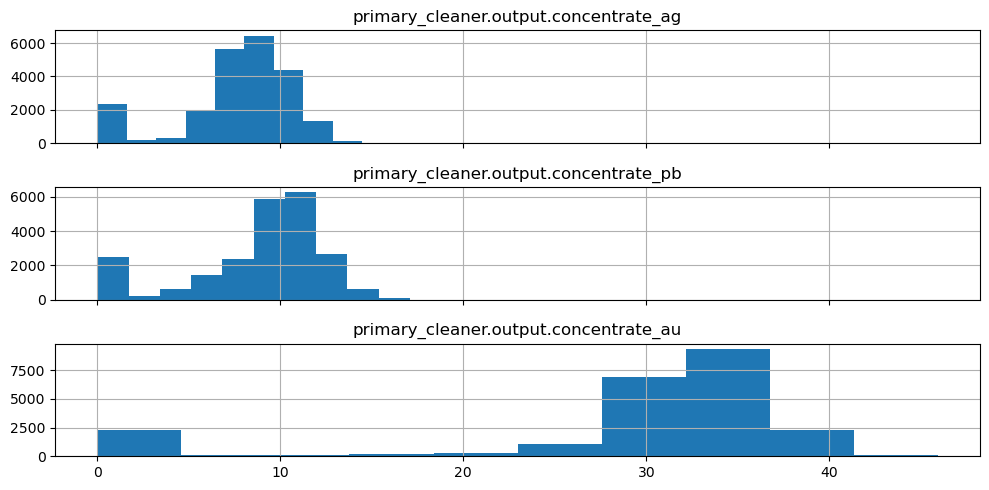

In [32]:

# Crear una figura con un subplot compartido
fig, ax = plt.subplots(nrows=len(concentrado_1.columns), ncols=1,figsize=(10, 5), sharex=True, sharey=False)

# Crear los histogramas en el mismo subplot
concentrado_1.hist(ax=ax, bins=10)

# Ajustar los espacios entre subplots y mostrar la figura
fig.tight_layout()
plt.show()

In [33]:
#Variables intervimientes
columnas=['final.output.concentrate_ag','final.output.concentrate_pb','final.output.concentrate_au']
concentrado_2=df_merge.loc[:,columnas]
concentrado_2

,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_au
0,6.055403,9.889648,42.192020
1,6.029369,9.968944,42.701629
2,6.055926,10.213995,42.657501
3,6.047977,9.977019,42.689819
4,6.148599,10.142511,42.774141
...,...,...,...
22711,3.224920,11.356233,46.713954
22712,3.195978,11.349355,46.866780
22713,3.109998,11.434366,46.795691
22714,3.367241,11.625587,46.408188


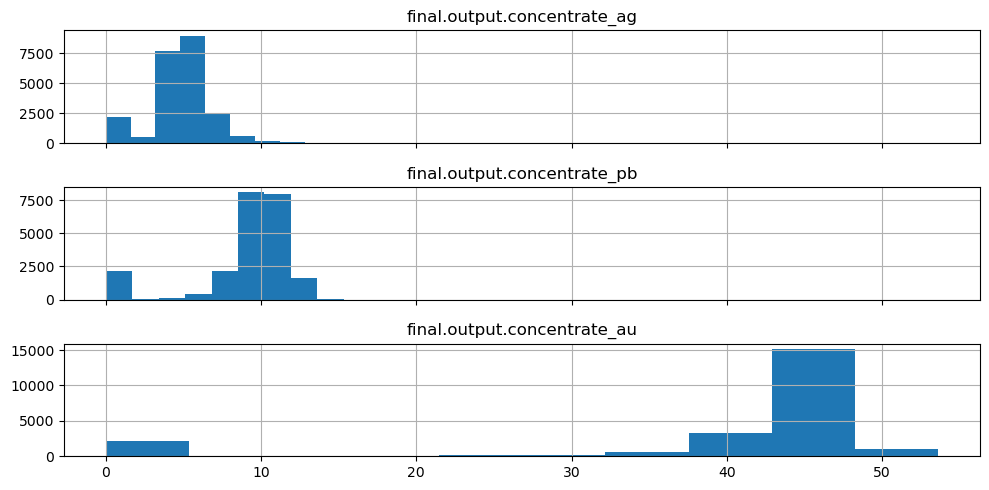

In [34]:
# Crear una figura con un subplot compartido
fig, ax = plt.subplots(nrows=len(concentrado_2.columns), ncols=1,figsize=(10, 5), sharex=True, sharey=False)

# Crear los histogramas en el mismo subplot
concentrado_2.hist(ax=ax, bins=10)

# Ajustar los espacios entre subplots y mostrar la figura
fig.tight_layout()
plt.show()

Observando el comportamiento entre la primera y segunda purificacion en funcion a los metales selecionados podemos ver lo siguiente:
* el Ag en la primer purificacion se concentran sus valores entre 7 y 11, mientras que en la segunda purificacion lo hace entre 4 y 7

* el Pb en la primer purificacion se concentra entre 9 y 12, similar a la segunda.

* el Au en la primer purificacion esta entre 28 y 36, mientras que en la segunda es 44 y 48.

En el primer metal en la segunda purificacion su concentracion baja, en el segundo metal se mantiene y el oro sube.

#### Particulas de Alimentacion <a id='3.4'></a>

In [35]:
#Variables intervimientes
columnas=['rougher.input.feed_au','rougher.input.feed_ag','rougher.input.feed_pb']
PA=df_prueba.loc[:,columnas]

# normalizar los datos
scaler = StandardScaler()
normalized_data = scaler.fit_transform(PA)
normalized_data=pd.DataFrame(normalized_data)
PA=normalized_data.rename(columns={0: 'rougher.input.feed_au',1:'rougher.input.feed_ag',2:'rougher.input.feed_pb'})
PA

,rougher.input.feed_au,rougher.input.feed_ag,rougher.input.feed_pb
0,1.205788,1.470640,1.569748
1,1.146916,1.439739,1.486354
2,1.208365,1.473936,1.411358
3,1.240547,1.226861,1.176352
4,0.922821,0.867559,0.914535
...,...,...,...
5851,0.660460,0.971874,0.860210
5852,0.553327,0.871129,0.696713
5853,0.523038,0.853657,0.641653
5854,0.488120,0.854930,0.595045


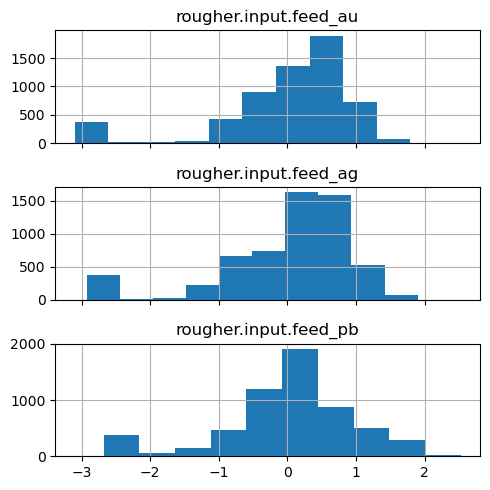

In [36]:
# Crear una figura con subplots
fig, axes = plt.subplots(nrows=len(PA.columns), ncols=1, figsize=(5, 5), sharex=True, sharey=False)

# Iterar sobre cada columna y graficarla en un subplot diferente
for i, col in enumerate(PA.columns):
    axes[i].set_title(col)
    PA[col].hist(ax=axes[i])

# Ajustar los espacios entre subplots y mostrar la figura
fig.tight_layout()
plt.show()

In [37]:
#Variables intervimientes
columnas=['rougher.input.feed_au','rougher.input.feed_ag','rougher.input.feed_pb']
PA=df_entrenamiento.loc[:,columnas]

# normalizar los datos
scaler = StandardScaler()
normalized_data = scaler.fit_transform(PA)
normalized_data=pd.DataFrame(normalized_data)
PA=normalized_data.rename(columns={0: 'rougher.input.feed_au',1:'rougher.input.feed_ag',2:'rougher.input.feed_pb'})
PA

,rougher.input.feed_au,rougher.input.feed_ag,rougher.input.feed_pb
0,-0.217493,-0.537865,-0.604464
1,-0.219994,-0.518688,-0.617090
2,-0.258448,-0.532789,-0.688251
3,-0.339094,-0.555885,-0.769713
4,-0.489288,-0.550326,-0.937520
...,...,...,...
16855,-0.597631,-0.540557,0.955461
16856,-0.761956,-0.531252,0.639437
16857,-0.865578,-0.578870,0.555854
16858,-0.919207,-0.554363,0.477300


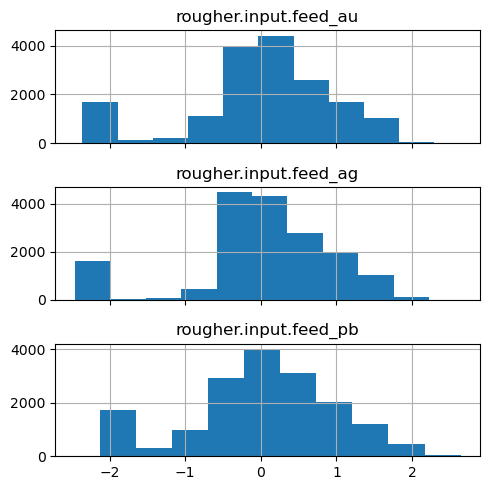

In [38]:
# Crear una figura con subplots
fig, axes = plt.subplots(nrows=len(PA.columns), ncols=1, figsize=(5, 5), sharex=True, sharey=False)

# Iterar sobre cada columna y graficarla en un subplot diferente
for i, col in enumerate(PA.columns):
    axes[i].set_title(col)
    PA[col].hist(ax=axes[i])

# Ajustar los espacios entre subplots y mostrar la figura
fig.tight_layout()
plt.show()

La distribucion de las variables en el dataFrame de entrenamiento y prueba varian, por lo que abordaremos para entrenar el modelo la validacion cruzada.

#### Concentraciones Totales <a id='3.5'></a>

##### Au

In [39]:
columnas=['rougher.output.concentrate_au','primary_cleaner.output.concentrate_au','final.output.concentrate_au']

concentrado_au=df_merge.loc[:,columnas]

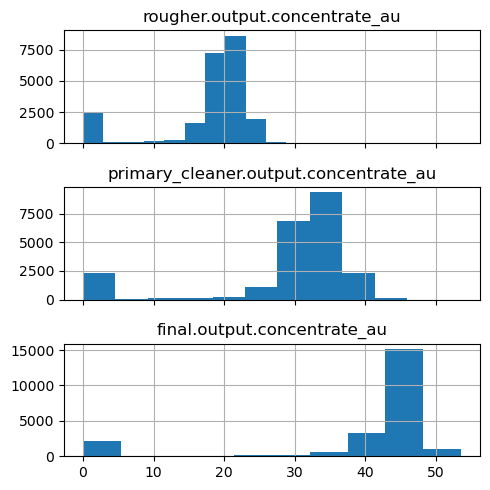

In [40]:
# Crear una figura con subplots
fig, axes = plt.subplots(nrows=len(concentrado_au.columns), ncols=1, figsize=(5, 5), sharex=True, sharey=False)

# Iterar sobre cada columna y graficarla en un subplot diferente
for i, col in enumerate(concentrado_au.columns):
    axes[i].set_title(col)
    concentrado_au[col].hist(ax=axes[i])

# Ajustar los espacios entre subplots y mostrar la figura
fig.tight_layout()
plt.show()

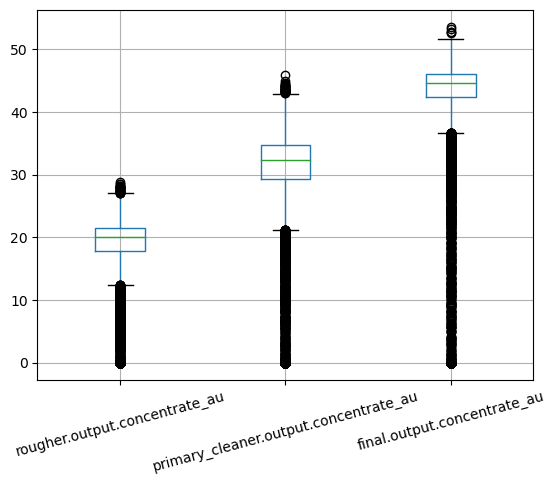

In [41]:
# crear la figura y el gráfico de dispersión
fig = concentrado_au.boxplot()


# rotar las etiquetas en 45 grados

fig.tick_params(axis='x', labelrotation=15)

In [42]:
def elimina_anormal(df,columna):
    for col in columna:
        # Cálculo del rango intercuartil (IQR)
        q1, q3 = np.percentile(df[col], [25, 75])
        iqr = q3 - q1
        # Cálculo de los valores de los bigotes
        lower_bound = q1 - 1.5 * iqr
        upper_bound = q3 + 1.5 * iqr
        df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
        
    return df

In [43]:
columnas=['rougher.output.concentrate_au','primary_cleaner.output.concentrate_au','final.output.concentrate_au']
df_entrenamiento=elimina_anormal(df_entrenamiento,columnas)

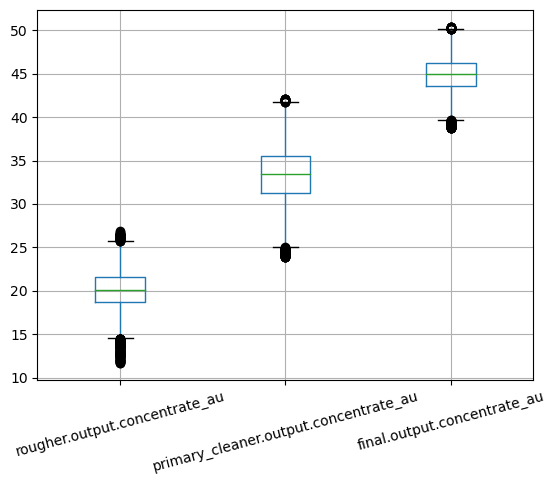

In [44]:
fig=df_entrenamiento.loc[:,columnas].boxplot()
# rotar las etiquetas en 45 grados

fig.tick_params(axis='x', labelrotation=15)

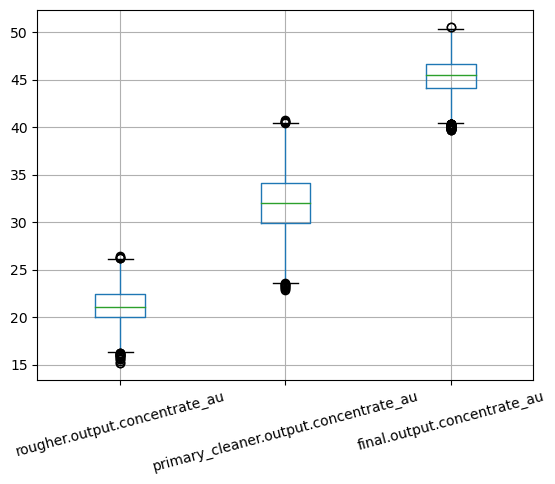

In [45]:
columnas=['rougher.output.concentrate_au','primary_cleaner.output.concentrate_au','final.output.concentrate_au']
df_prueba=elimina_anormal(df_prueba,columnas)
fig=df_prueba.loc[:,columnas].boxplot()
fig.tick_params(axis='x', labelrotation=15)


##### Ag

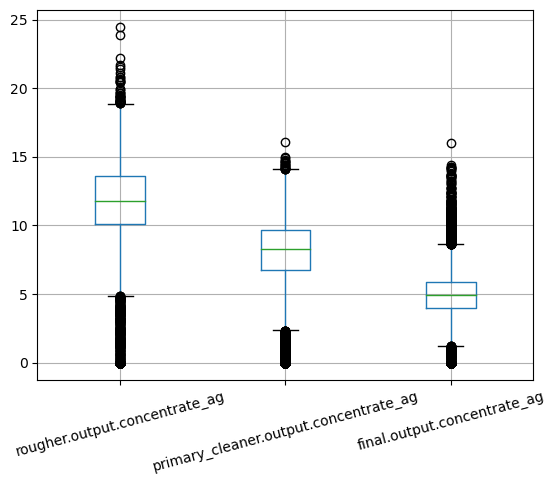

In [46]:
columnas=['rougher.output.concentrate_ag','primary_cleaner.output.concentrate_ag','final.output.concentrate_ag']

concentrado_ag=df_merge.loc[:,columnas]
fig=concentrado_ag.boxplot()
fig.tick_params(axis='x', labelrotation=15)

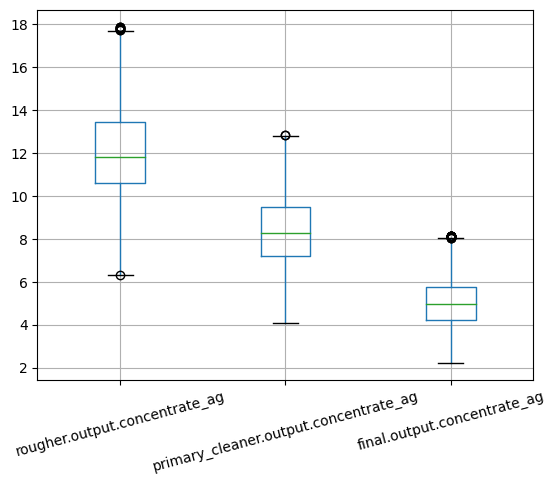

In [47]:
df_entrenamiento=elimina_anormal(df_entrenamiento,columnas)
fig=df_entrenamiento.loc[:,columnas].boxplot()
fig.tick_params(axis='x', labelrotation=15)

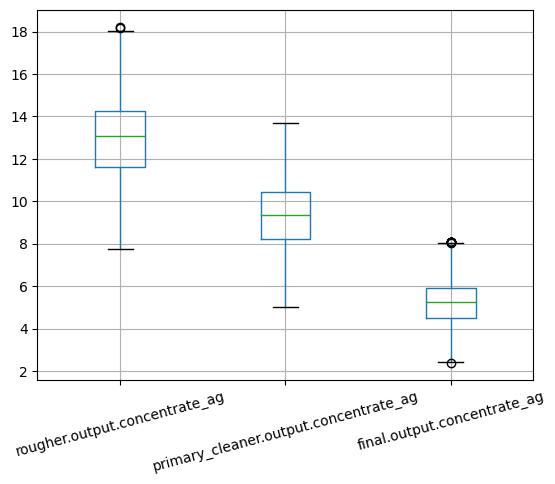

In [48]:
df_prueba=elimina_anormal(df_prueba,columnas)
fig=df_prueba.loc[:,columnas].boxplot()
fig.tick_params(axis='x', labelrotation=15)

##### Pb

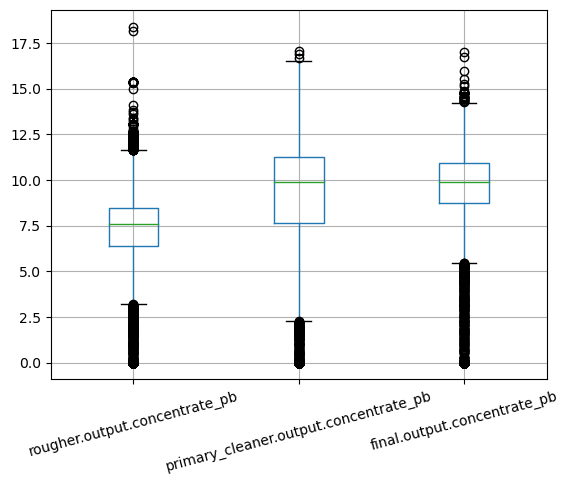

In [49]:
columnas=['rougher.output.concentrate_pb','primary_cleaner.output.concentrate_pb','final.output.concentrate_pb']

concentrado_pb=df_merge.loc[:,columnas]
fig=concentrado_pb.boxplot()
fig.tick_params(axis='x', labelrotation=15)

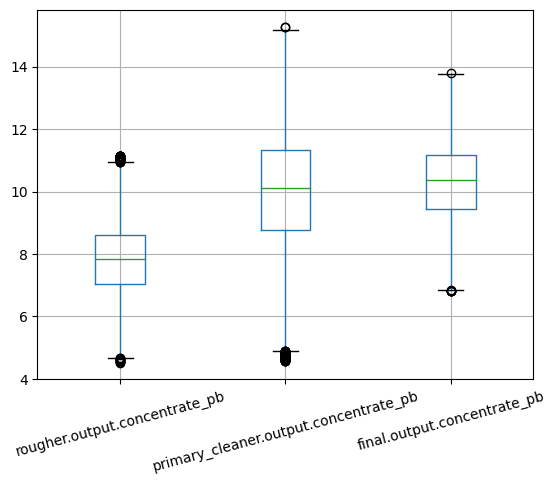

In [50]:
df_entrenamiento=elimina_anormal(df_entrenamiento,columnas)
fig=df_entrenamiento.loc[:,columnas].boxplot()
fig.tick_params(axis='x', labelrotation=15)

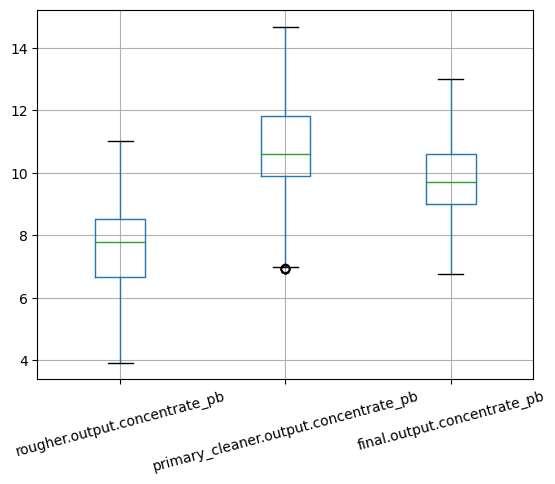

In [51]:
df_prueba=elimina_anormal(df_prueba,columnas)
fig=df_prueba.loc[:,columnas].boxplot()
fig.tick_params(axis='x', labelrotation=15)

##### Concluciones

In [52]:
print(df_entrenamiento.shape)
print(df_prueba.shape)

(11719, 92)
(4532, 91)


Se eliminaron los registros anormales en los grados de concentracion lo que implico una reduccion en las bases originales del 40%

## Calculo del sMAPE <a id='4'></a>

In [53]:
def smape(y_true, y_pred):
    return np.mean(2.0 * np.abs(y_pred - y_true) / (np.abs(y_true) + np.abs(y_pred)))*100

smape_scorer = make_scorer(smape, greater_is_better=False)

In [54]:
def smape_final(y_true_r, y_pred_r,y_true_f, y_pred_f):
    smape_r = smape(y_true_r, y_pred_r)
    smape_f = smape(y_true_f, y_pred_f)
    
    return 0.25*smape_r + 0.75*smape_f 

## Modelizacion <a id='5'></a>

##### Variables de Entrenamiento <a id='5.1'></a>

In [55]:

#Variables
features =df_entrenamiento.drop(['date','day','año','mes', 'dia','recupero_rougher','rougher.output.recovery','final.output.recovery'], axis=1)
target_rougher =df_entrenamiento['rougher.output.recovery']
target_final=df_entrenamiento['final.output.recovery']


### Arbol de Decision <a id='5.2'></a>

In [56]:
#tecnicas de muestreos
best_score = float('inf')
best_est = 0

for est in range(1, 10):
    model = DecisionTreeRegressor(random_state=12345, max_depth=est)
    predict_rougher=cross_val_predict(model, features, target_rougher, cv=5)
    predict_final=cross_val_predict(model, features, target_final, cv=5)
    score=smape_final(target_rougher, predict_rougher,target_final, predict_final)

   
    if score < best_score:
        best_score = score
        best_est = est

print('Mejor score:', best_score)
print('Mejor valor de max_depth:', best_est)

Mejor score: 4.036798027731171
Mejor valor de max_depth: 9


### Bosque Aleatorio <a id='5.3'></a>

In [57]:
#Buscar el mejor estimador del modelo

best_score = float('inf')
best_est = 0
best_depth=0

for depth in range(1,10): 
    for est in range(1,10):
        
        model=RandomForestRegressor(random_state=12345, max_depth=depth, n_estimators=est)
        predict_rougher=cross_val_predict(model, features, target_rougher, cv=5)
        predict_final=cross_val_predict(model, features, target_final, cv=5)
        score=smape_final(target_rougher, predict_rougher,target_final, predict_final)
        
        if score < best_score:
            best_score = score
            best_est = est
            best_depth=depth

print('Mejor score:', best_score)
print('Mejor valor de max_depth:', best_depth)
print('Mejor valor de max_est:', best_est)

Mejor score: 2.3318766043135786
Mejor valor de max_depth: 9
Mejor valor de max_est: 7


In [58]:
# El mejor bosque

model=RandomForestRegressor(random_state=12345, n_estimators=7, max_depth=9)
predict_rougher=cross_val_predict(model, features, target_rougher, cv=5)
predict_final=cross_val_predict(model, features, target_final, cv=5)
score=smape_final(target_rougher, predict_rougher,target_final, predict_final)
score

2.3318766043135786

### Regresion Lineal <a id='5.4'></a>

In [59]:
model=LinearRegression()
predict_rougher=cross_val_predict(model, features, target_rougher, cv=5)
predict_final=cross_val_predict(model, features, target_final, cv=5)
score=smape_final(target_rougher, predict_rougher,target_final, predict_final)
score

print('Score:',score)

Score: 3.126461836120644


## Prueba en el DataFrame de Test <a id='6'></a>

In [60]:
#Variables
column_orden=features.columns
features_test =df_prueba.drop(['date','day','año','mes', 'dia','rougher.output.recovery','final.output.recovery'], axis=1)
features_test=features_test.reindex(columns=column_orden)
target_rougher_test =df_prueba['rougher.output.recovery']
target_final_test=df_prueba['final.output.recovery']



In [61]:
#el mejor modelo
model= RandomForestRegressor(random_state=12345, n_estimators=7, max_depth=9)
model_1=model.fit(features,target_rougher)
model_2=model.fit(features,target_final)
predict1=model_1.predict(features_test)
predict2=model_2.predict(features_test)

In [132]:
# Calcular el error de sMAPE en el conjunto de prueba
smape_final=smape_final(target_rougher_test, predict1,target_final_test, predict2)
print(smape_final)

6.705145581587262


## Conclusiones <a id='7'></a>

Se importaron las liberias necesarias y se extrajeron los datos. Posteriormente se estudio la información para corroborar la integridad de los datos y si había valores ausentes. Lo que se pudo concluir que las tres bases de datos contenían valores ausentes en varias de sus columnas.

Se estudio los valores ausentes de la base de datos full y se encontró un patron de comportamiento que estaba relacionado al periodo de tiempo, por lo que se agregaron columnas de fecha para calcular la mediana por mes de cada variable y posteriormente se reemplazó por este. Luego se relaciono la base full con el DataFrame de test y train para completar con los valores de la tabla principal.

Posteriormente se procedió con el análisis de datos. Como primer punto se observo el recupero del Rougher si estaba bien calculado. Se corroboro por medio del EAM que estaba bien calculado.

Luego se analizaron las características no disponibles en la base de datos de prueba; que correspondía principalmente a las variables de output.

Seguido de esto se analizo la concentración en las diferentes etapas. Observando el comportamiento entre la primera y segunda purificacion en funcion a los metales selecionados podemos ver lo siguiente:

* el Ag en la primer purificacion se concentran sus valores entre 7 y 11, mientras que en la segunda purificacion lo hace entre 4 y 7
* el Pb en la primer purificacion se concentra entre 9 y 12, similar a la segunda.
* el Au en la primer purificacion esta entre 28 y 36, mientras que en la segunda es 44 y 48.
* En el primer metal en la segunda purificacion su concentracion baja, en el segundo metal se mantiene y el oro sube.

Luego se estudio la distribución de las partículas de alimentación, normalizando las variables.

Posteriormente se eliminaron los valores anormales dentro de la concentración total de los metales seleccionados.

Por ultimo se modelizo utilizando tres modelos:
* Árbol de decisión
* Bosque Aleatorio
* Regresión logística

En todos ellos se aplico la validación cruzada, utilizando como métrica de evaluación el SMAPE. 

El mejor modelo que predice es el bosque aleatorio con 7 Estimadores y 9 arboles, dando un smape de 2.33%

Se hizo una prueba de testeo donde se encontró un valor para SMAPE del 6.7% 
